In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt

In [2]:
path = open(r'''C:\Users\user\Documents\formatted\January20171.csv''')
df = pd.read_csv(path, sep=',', header=0  , index_col=False)


In [3]:
df

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
5,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
6,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
7,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
8,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1
9,01-21-2017,22:49,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1


In [4]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1


In [5]:
z = df[['Date' , 'Time']]
z['Time'][0:2]


0    22:40
1    22:41
Name: Time, dtype: object

In [6]:
x = df[['Date', 'Time']].values
print(x)
x[3][1]

[['01-21-2017' '22:40']
 ['01-21-2017' '22:41']
 ['01-21-2017' '22:42']
 ...
 ['01-31-2017' '23:58']
 ['01-31-2017' '23:59']
 ['02-01-2017' '00:00']]


'22:43'

In [7]:
def _date_string(x):
    """Convert two integers to a string for the date and time."""

    date = x[0]
    date = re.sub('-' , '' , date)
    print(date)# Date. Example: 19801231
    time = x[1]
    time = re.sub(':' , '' , time)# Time. Example: 1230
    print(time)

    return "{0}{1}".format(date , time)

In [8]:
datestr = df[['Date', 'Time']].apply(_date_string, axis=1)
df['DateTime'] = pd.to_datetime(datestr, format='%m%d%Y%H%M')

01212017
2240
01212017
2241
01212017
2242
01212017
2243
01212017
2244
01212017
2245
01212017
2246
01212017
2247
01212017
2248
01212017
2249
01212017
2250
01212017
2251
01212017
2252
01212017
2253
01212017
2254
01212017
2255
01212017
2256
01212017
2257
01212017
2258
01212017
2259
01212017
2300
01212017
2301
01212017
2302
01212017
2303
01212017
2304
01212017
2305
01212017
2306
01212017
2307
01212017
2308
01212017
2309
01212017
2310
01212017
2311
01212017
2312
01212017
2313
01212017
2314
01212017
2315
01212017
2316
01212017
2317
01212017
2318
01212017
2319
01212017
2320
01212017
2321
01212017
2322
01212017
2323
01212017
2324
01212017
2325
01212017
2326
01212017
2327
01212017
2328
01212017
2329
01212017
2330
01212017
2331
01212017
2332
01212017
2333
01212017
2334
01212017
2335
01212017
2336
01212017
2337
01212017
2338
01212017
2339
01212017
2340
01212017
2341
01212017
2342
01212017
2343
01212017
2344
01212017
2345
01212017
2346
01212017
2347
01212017
2348
01212017
2349
01212017
2350
012120

01222017
0917
01222017
0918
01222017
0919
01222017
0920
01222017
0921
01222017
0922
01222017
0923
01222017
0924
01222017
0925
01222017
0926
01222017
0927
01222017
0928
01222017
0929
01222017
0930
01222017
0931
01222017
0932
01222017
0933
01222017
0934
01222017
0935
01222017
0936
01222017
0937
01222017
0938
01222017
0939
01222017
0940
01222017
0941
01222017
0942
01222017
0943
01222017
0944
01222017
0945
01222017
0946
01222017
0947
01222017
0948
01222017
0949
01222017
0950
01222017
0951
01222017
0952
01222017
0953
01222017
0954
01222017
0955
01222017
0956
01222017
0957
01222017
0958
01222017
0959
01222017
1000
01222017
1001
01222017
1002
01222017
1003
01222017
1004
01222017
1005
01222017
1006
01222017
1007
01222017
1008
01222017
1009
01222017
1010
01222017
1011
01222017
1012
01222017
1013
01222017
1014
01222017
1015
01222017
1016
01222017
1017
01222017
1018
01222017
1019
01222017
1020
01222017
1021
01222017
1022
01222017
1023
01222017
1024
01222017
1025
01222017
1026
01222017
1027
012220

01222017
2307
01222017
2308
01222017
2309
01222017
2310
01222017
2311
01222017
2312
01222017
2313
01222017
2314
01222017
2315
01222017
2316
01222017
2317
01222017
2318
01222017
2319
01222017
2320
01222017
2321
01222017
2322
01222017
2323
01222017
2324
01222017
2325
01222017
2326
01222017
2327
01222017
2328
01222017
2329
01222017
2330
01222017
2331
01222017
2332
01222017
2333
01222017
2334
01222017
2335
01222017
2336
01222017
2337
01222017
2338
01222017
2339
01222017
2340
01222017
2341
01222017
2342
01222017
2343
01222017
2344
01222017
2345
01222017
2346
01222017
2347
01222017
2348
01222017
2349
01222017
2350
01222017
2351
01222017
2352
01222017
2353
01222017
2354
01222017
2355
01222017
2356
01222017
2357
01222017
2358
01222017
2359
01232017
0000
01232017
0001
01232017
0002
01232017
0003
01232017
0004
01232017
0005
01232017
0006
01232017
0007
01232017
0008
01232017
0009
01232017
0010
01232017
0011
01232017
0012
01232017
0013
01232017
0014
01232017
0015
01232017
0016
01232017
0017
012320

1546
01232017
1547
01232017
1548
01232017
1549
01232017
1550
01232017
1551
01232017
1552
01232017
1553
01232017
1554
01232017
1555
01232017
1556
01232017
1557
01232017
1558
01232017
1559
01232017
1600
01232017
1601
01232017
1602
01232017
1603
01232017
1604
01232017
1605
01232017
1606
01232017
1607
01232017
1608
01232017
1609
01232017
1610
01232017
1611
01232017
1612
01232017
1613
01232017
1614
01232017
1615
01232017
1616
01232017
1617
01232017
1618
01232017
1619
01232017
1620
01232017
1621
01232017
1622
01232017
1623
01232017
1624
01232017
1625
01232017
1626
01232017
1627
01232017
1628
01232017
1629
01232017
1630
01232017
1631
01232017
1632
01232017
1633
01232017
1634
01232017
1635
01232017
1636
01232017
1637
01232017
1638
01232017
1639
01232017
1640
01232017
1641
01232017
1642
01232017
1643
01232017
1644
01232017
1645
01232017
1646
01232017
1647
01232017
1648
01232017
1649
01232017
1650
01232017
1651
01232017
1652
01232017
1653
01232017
1654
01232017
1655
01232017
1656
01232017
1657
0

01242017
0832
01242017
0833
01242017
0834
01242017
0835
01242017
0836
01242017
0837
01242017
0838
01242017
0839
01242017
0840
01242017
0841
01242017
0842
01242017
0843
01242017
0844
01242017
0845
01242017
0846
01242017
0847
01242017
0848
01242017
0849
01242017
0850
01242017
0851
01242017
0852
01242017
0853
01242017
0854
01242017
0855
01242017
0856
01242017
0857
01242017
0858
01242017
0859
01242017
0900
01242017
0901
01242017
0902
01242017
0903
01242017
0904
01242017
0905
01242017
0906
01242017
0907
01242017
0908
01242017
0909
01242017
0910
01242017
0911
01242017
0912
01242017
0913
01242017
0914
01242017
0915
01242017
0916
01242017
0917
01242017
0918
01242017
0919
01242017
0920
01242017
0921
01242017
0922
01242017
0923
01242017
0924
01242017
0925
01242017
0926
01242017
0927
01242017
0928
01242017
0929
01242017
0930
01242017
0931
01242017
0932
01242017
0933
01242017
0934
01242017
0935
01242017
0936
01242017
0937
01242017
0938
01242017
0939
01242017
0940
01242017
0941
01242017
0942
012420

0111
01252017
0112
01252017
0113
01252017
0114
01252017
0115
01252017
0116
01252017
0117
01252017
0118
01252017
0119
01252017
0120
01252017
0121
01252017
0122
01252017
0123
01252017
0124
01252017
0125
01252017
0126
01252017
0127
01252017
0128
01252017
0129
01252017
0130
01252017
0131
01252017
0132
01252017
0133
01252017
0134
01252017
0135
01252017
0136
01252017
0137
01252017
0138
01252017
0139
01252017
0140
01252017
0141
01252017
0142
01252017
0143
01252017
0144
01252017
0145
01252017
0146
01252017
0147
01252017
0148
01252017
0149
01252017
0150
01252017
0151
01252017
0152
01252017
0153
01252017
0154
01252017
0155
01252017
0156
01252017
0157
01252017
0158
01252017
0159
01252017
0200
01252017
0201
01252017
0202
01252017
0203
01252017
0204
01252017
0205
01252017
0206
01252017
0207
01252017
0208
01252017
0209
01252017
0210
01252017
0211
01252017
0212
01252017
0213
01252017
0214
01252017
0215
01252017
0216
01252017
0217
01252017
0218
01252017
0219
01252017
0220
01252017
0221
01252017
0222
0

01252017
1751
01252017
1752
01252017
1753
01252017
1754
01252017
1755
01252017
1756
01252017
1757
01252017
1758
01252017
1759
01252017
1800
01252017
1801
01252017
1802
01252017
1803
01252017
1804
01252017
1805
01252017
1806
01252017
1807
01252017
1808
01252017
1809
01252017
1810
01252017
1811
01252017
1812
01252017
1813
01252017
1814
01252017
1815
01252017
1816
01252017
1817
01252017
1818
01252017
1819
01252017
1820
01252017
1821
01252017
1822
01252017
1823
01252017
1824
01252017
1825
01252017
1826
01252017
1827
01252017
1828
01252017
1829
01252017
1830
01252017
1831
01252017
1832
01252017
1833
01252017
1834
01252017
1835
01252017
1836
01252017
1837
01252017
1838
01252017
1839
01252017
1840
01252017
1841
01252017
1842
01252017
1843
01252017
1844
01252017
1845
01252017
1846
01252017
1847
01252017
1848
01252017
1849
01252017
1850
01252017
1851
01252017
1852
01252017
1853
01252017
1854
01252017
1855
01252017
1856
01252017
1857
01252017
1858
01252017
1859
01252017
1900
01252017
1901
012520

1033
01262017
1034
01262017
1035
01262017
1036
01262017
1037
01262017
1038
01262017
1039
01262017
1040
01262017
1041
01262017
1042
01262017
1043
01262017
1044
01262017
1045
01262017
1046
01262017
1047
01262017
1048
01262017
1049
01262017
1050
01262017
1051
01262017
1052
01262017
1053
01262017
1054
01262017
1055
01262017
1056
01262017
1057
01262017
1058
01262017
1059
01262017
1100
01262017
1101
01262017
1102
01262017
1103
01262017
1104
01262017
1105
01262017
1106
01262017
1107
01262017
1108
01262017
1109
01262017
1110
01262017
1111
01262017
1112
01262017
1113
01262017
1114
01262017
1115
01262017
1116
01262017
1117
01262017
1118
01262017
1119
01262017
1120
01262017
1121
01262017
1122
01262017
1123
01262017
1124
01262017
1125
01262017
1126
01262017
1127
01262017
1128
01262017
1129
01262017
1130
01262017
1131
01262017
1132
01262017
1133
01262017
1134
01262017
1135
01262017
1136
01262017
1137
01262017
1138
01262017
1139
01262017
1140
01262017
1141
01262017
1142
01262017
1143
01262017
1144
0

01272017
0313
01272017
0314
01272017
0315
01272017
0316
01272017
0317
01272017
0318
01272017
0319
01272017
0320
01272017
0321
01272017
0322
01272017
0323
01272017
0324
01272017
0325
01272017
0326
01272017
0327
01272017
0328
01272017
0329
01272017
0330
01272017
0331
01272017
0332
01272017
0333
01272017
0334
01272017
0335
01272017
0336
01272017
0337
01272017
0338
01272017
0339
01272017
0340
01272017
0341
01272017
0342
01272017
0343
01272017
0344
01272017
0345
01272017
0346
01272017
0347
01272017
0348
01272017
0349
01272017
0350
01272017
0351
01272017
0352
01272017
0353
01272017
0354
01272017
0355
01272017
0356
01272017
0357
01272017
0358
01272017
0359
01272017
0400
01272017
0401
01272017
0402
01272017
0403
01272017
0404
01272017
0405
01272017
0406
01272017
0407
01272017
0408
01272017
0409
01272017
0410
01272017
0411
01272017
0412
01272017
0413
01272017
0414
01272017
0415
01272017
0416
01272017
0417
01272017
0418
01272017
0419
01272017
0420
01272017
0421
01272017
0422
01272017
0423
012720

1955
01272017
1956
01272017
1957
01272017
1958
01272017
1959
01272017
2000
01272017
2001
01272017
2002
01272017
2003
01272017
2004
01272017
2005
01272017
2006
01272017
2007
01272017
2008
01272017
2009
01272017
2010
01272017
2011
01272017
2012
01272017
2013
01272017
2014
01272017
2015
01272017
2016
01272017
2017
01272017
2018
01272017
2019
01272017
2020
01272017
2021
01272017
2022
01272017
2023
01272017
2024
01272017
2025
01272017
2026
01272017
2027
01272017
2028
01272017
2029
01272017
2030
01272017
2031
01272017
2032
01272017
2033
01272017
2034
01272017
2035
01272017
2036
01272017
2037
01272017
2038
01272017
2039
01272017
2040
01272017
2041
01272017
2042
01272017
2043
01272017
2044
01272017
2045
01272017
2046
01272017
2047
01272017
2048
01272017
2049
01272017
2050
01272017
2051
01272017
2052
01272017
2053
01272017
2054
01272017
2055
01272017
2056
01272017
2057
01272017
2058
01272017
2059
01272017
2100
01272017
2101
01272017
2102
01272017
2103
01272017
2104
01272017
2105
01272017
2106
0

01282017
1235
01282017
1236
01282017
1237
01282017
1238
01282017
1239
01282017
1240
01282017
1241
01282017
1242
01282017
1243
01282017
1244
01282017
1245
01282017
1246
01282017
1247
01282017
1248
01282017
1249
01282017
1250
01282017
1251
01282017
1252
01282017
1253
01282017
1254
01282017
1255
01282017
1256
01282017
1257
01282017
1258
01282017
1259
01282017
1300
01282017
1301
01282017
1302
01282017
1303
01282017
1304
01282017
1305
01282017
1306
01282017
1307
01282017
1308
01282017
1309
01282017
1310
01282017
1311
01282017
1312
01282017
1313
01282017
1314
01282017
1315
01282017
1316
01282017
1317
01282017
1318
01282017
1319
01282017
1320
01282017
1321
01282017
1322
01282017
1323
01282017
1324
01282017
1325
01282017
1326
01282017
1327
01282017
1328
01282017
1329
01282017
1330
01282017
1331
01282017
1332
01282017
1333
01282017
1334
01282017
1335
01282017
1336
01282017
1337
01282017
1338
01282017
1339
01282017
1340
01282017
1341
01282017
1342
01282017
1343
01282017
1344
01282017
1345
012820

0514
01292017
0515
01292017
0516
01292017
0517
01292017
0518
01292017
0519
01292017
0520
01292017
0521
01292017
0522
01292017
0523
01292017
0524
01292017
0525
01292017
0526
01292017
0527
01292017
0528
01292017
0529
01292017
0530
01292017
0531
01292017
0532
01292017
0533
01292017
0534
01292017
0535
01292017
0536
01292017
0537
01292017
0538
01292017
0539
01292017
0540
01292017
0541
01292017
0542
01292017
0543
01292017
0544
01292017
0545
01292017
0546
01292017
0547
01292017
0548
01292017
0549
01292017
0550
01292017
0551
01292017
0552
01292017
0553
01292017
0554
01292017
0555
01292017
0556
01292017
0557
01292017
0558
01292017
0559
01292017
0600
01292017
0601
01292017
0602
01292017
0603
01292017
0604
01292017
0605
01292017
0606
01292017
0607
01292017
0608
01292017
0609
01292017
0610
01292017
0611
01292017
0612
01292017
0613
01292017
0614
01292017
0615
01292017
0616
01292017
0617
01292017
0618
01292017
0619
01292017
0620
01292017
0621
01292017
0622
01292017
0623
01292017
0624
01292017
0625
0

01292017
2157
01292017
2158
01292017
2159
01292017
2200
01292017
2201
01292017
2202
01292017
2203
01292017
2204
01292017
2205
01292017
2206
01292017
2207
01292017
2208
01292017
2209
01292017
2210
01292017
2211
01292017
2212
01292017
2213
01292017
2214
01292017
2215
01292017
2216
01292017
2217
01292017
2218
01292017
2219
01292017
2220
01292017
2221
01292017
2222
01292017
2223
01292017
2224
01292017
2225
01292017
2226
01292017
2227
01292017
2228
01292017
2229
01292017
2230
01292017
2231
01292017
2232
01292017
2233
01292017
2234
01292017
2235
01292017
2236
01292017
2237
01292017
2238
01292017
2239
01292017
2240
01292017
2241
01292017
2242
01292017
2243
01292017
2244
01292017
2245
01292017
2246
01292017
2247
01292017
2248
01292017
2249
01292017
2250
01292017
2251
01292017
2252
01292017
2253
01292017
2254
01292017
2255
01292017
2256
01292017
2257
01292017
2258
01292017
2259
01292017
2300
01292017
2301
01292017
2302
01292017
2303
01292017
2304
01292017
2305
01292017
2306
01292017
2307
012920

1436
01302017
1437
01302017
1438
01302017
1439
01302017
1440
01302017
1441
01302017
1442
01302017
1443
01302017
1444
01302017
1445
01302017
1446
01302017
1447
01302017
1448
01302017
1449
01302017
1450
01302017
1451
01302017
1452
01302017
1453
01302017
1454
01302017
1455
01302017
1456
01302017
1457
01302017
1458
01302017
1459
01302017
1500
01302017
1501
01302017
1502
01302017
1503
01302017
1504
01302017
1505
01302017
1506
01302017
1507
01302017
1508
01302017
1509
01302017
1510
01302017
1511
01302017
1512
01302017
1513
01302017
1514
01302017
1515
01302017
1516
01302017
1517
01302017
1518
01302017
1519
01302017
1520
01302017
1521
01302017
1522
01302017
1523
01302017
1524
01302017
1525
01302017
1526
01302017
1527
01302017
1528
01302017
1529
01302017
1530
01302017
1531
01302017
1532
01302017
1533
01302017
1534
01302017
1535
01302017
1536
01302017
1537
01302017
1538
01302017
1539
01302017
1540
01302017
1541
01302017
1542
01302017
1543
01302017
1544
01302017
1545
01302017
1546
01302017
1547
0

01312017
0716
01312017
0717
01312017
0718
01312017
0719
01312017
0720
01312017
0721
01312017
0722
01312017
0723
01312017
0724
01312017
0725
01312017
0726
01312017
0727
01312017
0728
01312017
0729
01312017
0730
01312017
0731
01312017
0732
01312017
0733
01312017
0734
01312017
0735
01312017
0736
01312017
0737
01312017
0738
01312017
0739
01312017
0740
01312017
0741
01312017
0742
01312017
0743
01312017
0744
01312017
0745
01312017
0746
01312017
0747
01312017
0748
01312017
0749
01312017
0750
01312017
0751
01312017
0752
01312017
0753
01312017
0754
01312017
0755
01312017
0756
01312017
0757
01312017
0758
01312017
0759
01312017
0800
01312017
0801
01312017
0802
01312017
0803
01312017
0804
01312017
0805
01312017
0806
01312017
0807
01312017
0808
01312017
0809
01312017
0810
01312017
0811
01312017
0812
01312017
0813
01312017
0814
01312017
0815
01312017
0816
01312017
0817
01312017
0818
01312017
0819
01312017
0820
01312017
0821
01312017
0822
01312017
0823
01312017
0824
01312017
0825
01312017
0826
013120

2358
01312017
2359
02012017
0000


In [9]:
df.head()

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00


In [10]:
df['DateTime']=df['DateTime'].dt.strftime('%d-%m-%Y')

In [11]:
df['DateTime']

0        21-01-2017
1        21-01-2017
2        21-01-2017
3        21-01-2017
4        21-01-2017
5        21-01-2017
6        21-01-2017
7        21-01-2017
8        21-01-2017
9        21-01-2017
10       21-01-2017
11       21-01-2017
12       21-01-2017
13       21-01-2017
14       21-01-2017
15       21-01-2017
16       21-01-2017
17       21-01-2017
18       21-01-2017
19       21-01-2017
20       21-01-2017
21       21-01-2017
22       21-01-2017
23       21-01-2017
24       21-01-2017
25       21-01-2017
26       21-01-2017
27       21-01-2017
28       21-01-2017
29       21-01-2017
            ...    
14433    31-01-2017
14434    31-01-2017
14435    31-01-2017
14436    31-01-2017
14437    31-01-2017
14438    31-01-2017
14439    31-01-2017
14440    31-01-2017
14441    31-01-2017
14442    31-01-2017
14443    31-01-2017
14444    31-01-2017
14445    31-01-2017
14446    31-01-2017
14447    31-01-2017
14448    31-01-2017
14449    31-01-2017
14450    31-01-2017
14451    31-01-2017


In [12]:
datestr = df[['DateTime', 'Time']].apply(_date_string, axis=1)
df['DateTime1'] = pd.to_datetime(datestr, format='%d%m%Y%H%M')

21012017
2240
21012017
2241
21012017
2242
21012017
2243
21012017
2244
21012017
2245
21012017
2246
21012017
2247
21012017
2248
21012017
2249
21012017
2250
21012017
2251
21012017
2252
21012017
2253
21012017
2254
21012017
2255
21012017
2256
21012017
2257
21012017
2258
21012017
2259
21012017
2300
21012017
2301
21012017
2302
21012017
2303
21012017
2304
21012017
2305
21012017
2306
21012017
2307
21012017
2308
21012017
2309
21012017
2310
21012017
2311
21012017
2312
21012017
2313
21012017
2314
21012017
2315
21012017
2316
21012017
2317
21012017
2318
21012017
2319
21012017
2320
21012017
2321
21012017
2322
21012017
2323
21012017
2324
21012017
2325
21012017
2326
21012017
2327
21012017
2328
21012017
2329
21012017
2330
21012017
2331
21012017
2332
21012017
2333
21012017
2334
21012017
2335
21012017
2336
21012017
2337
21012017
2338
21012017
2339
21012017
2340
21012017
2341
21012017
2342
21012017
2343
21012017
2344
21012017
2345
21012017
2346
21012017
2347
21012017
2348
21012017
2349
21012017
2350
210120

1503
22012017
1504
22012017
1505
22012017
1506
22012017
1507
22012017
1508
22012017
1509
22012017
1510
22012017
1511
22012017
1512
22012017
1513
22012017
1514
22012017
1515
22012017
1516
22012017
1517
22012017
1518
22012017
1519
22012017
1520
22012017
1521
22012017
1522
22012017
1523
22012017
1524
22012017
1525
22012017
1526
22012017
1527
22012017
1528
22012017
1529
22012017
1530
22012017
1531
22012017
1532
22012017
1533
22012017
1534
22012017
1535
22012017
1536
22012017
1537
22012017
1538
22012017
1539
22012017
1540
22012017
1541
22012017
1542
22012017
1543
22012017
1544
22012017
1545
22012017
1546
22012017
1547
22012017
1548
22012017
1549
22012017
1550
22012017
1551
22012017
1552
22012017
1553
22012017
1554
22012017
1555
22012017
1556
22012017
1557
22012017
1558
22012017
1559
22012017
1600
22012017
1601
22012017
1602
22012017
1603
22012017
1604
22012017
1605
22012017
1606
22012017
1607
22012017
1608
22012017
1609
22012017
1610
22012017
1611
22012017
1612
22012017
1613
22012017
1614
2

23012017
0743
23012017
0744
23012017
0745
23012017
0746
23012017
0747
23012017
0748
23012017
0749
23012017
0750
23012017
0751
23012017
0752
23012017
0753
23012017
0754
23012017
0755
23012017
0756
23012017
0757
23012017
0758
23012017
0759
23012017
0800
23012017
0801
23012017
0802
23012017
0803
23012017
0804
23012017
0805
23012017
0806
23012017
0807
23012017
0808
23012017
0809
23012017
0810
23012017
0811
23012017
0812
23012017
0813
23012017
0814
23012017
0815
23012017
0816
23012017
0817
23012017
0818
23012017
0819
23012017
0820
23012017
0821
23012017
0822
23012017
0823
23012017
0824
23012017
0825
23012017
0826
23012017
0827
23012017
0828
23012017
0829
23012017
0830
23012017
0831
23012017
0832
23012017
0833
23012017
0834
23012017
0835
23012017
0836
23012017
0837
23012017
0838
23012017
0839
23012017
0840
23012017
0841
23012017
0842
23012017
0843
23012017
0844
23012017
0845
23012017
0846
23012017
0847
23012017
0848
23012017
0849
23012017
0850
23012017
0851
23012017
0852
23012017
0853
230120

0025
24012017
0026
24012017
0027
24012017
0028
24012017
0029
24012017
0030
24012017
0031
24012017
0032
24012017
0033
24012017
0034
24012017
0035
24012017
0036
24012017
0037
24012017
0038
24012017
0039
24012017
0040
24012017
0041
24012017
0042
24012017
0043
24012017
0044
24012017
0045
24012017
0046
24012017
0047
24012017
0048
24012017
0049
24012017
0050
24012017
0051
24012017
0052
24012017
0053
24012017
0054
24012017
0055
24012017
0056
24012017
0057
24012017
0058
24012017
0059
24012017
0100
24012017
0101
24012017
0102
24012017
0103
24012017
0104
24012017
0105
24012017
0106
24012017
0107
24012017
0108
24012017
0109
24012017
0110
24012017
0111
24012017
0112
24012017
0113
24012017
0114
24012017
0115
24012017
0116
24012017
0117
24012017
0118
24012017
0119
24012017
0120
24012017
0121
24012017
0122
24012017
0123
24012017
0124
24012017
0125
24012017
0126
24012017
0127
24012017
0128
24012017
0129
24012017
0130
24012017
0131
24012017
0132
24012017
0133
24012017
0134
24012017
0135
24012017
0136
2

1535
24012017
1536
24012017
1537
24012017
1538
24012017
1539
24012017
1540
24012017
1541
24012017
1542
24012017
1543
24012017
1544
24012017
1545
24012017
1546
24012017
1547
24012017
1548
24012017
1549
24012017
1550
24012017
1551
24012017
1552
24012017
1553
24012017
1554
24012017
1555
24012017
1556
24012017
1557
24012017
1558
24012017
1559
24012017
1600
24012017
1601
24012017
1602
24012017
1603
24012017
1604
24012017
1605
24012017
1606
24012017
1607
24012017
1608
24012017
1609
24012017
1610
24012017
1611
24012017
1612
24012017
1613
24012017
1614
24012017
1615
24012017
1616
24012017
1617
24012017
1618
24012017
1619
24012017
1620
24012017
1621
24012017
1622
24012017
1623
24012017
1624
24012017
1625
24012017
1626
24012017
1627
24012017
1628
24012017
1629
24012017
1630
24012017
1631
24012017
1632
24012017
1633
24012017
1634
24012017
1635
24012017
1636
24012017
1637
24012017
1638
24012017
1639
24012017
1640
24012017
1641
24012017
1642
24012017
1643
24012017
1644
24012017
1645
24012017
1646
2

0537
25012017
0538
25012017
0539
25012017
0540
25012017
0541
25012017
0542
25012017
0543
25012017
0544
25012017
0545
25012017
0546
25012017
0547
25012017
0548
25012017
0549
25012017
0550
25012017
0551
25012017
0552
25012017
0553
25012017
0554
25012017
0555
25012017
0556
25012017
0557
25012017
0558
25012017
0559
25012017
0600
25012017
0601
25012017
0602
25012017
0603
25012017
0604
25012017
0605
25012017
0606
25012017
0607
25012017
0608
25012017
0609
25012017
0610
25012017
0611
25012017
0612
25012017
0613
25012017
0614
25012017
0615
25012017
0616
25012017
0617
25012017
0618
25012017
0619
25012017
0620
25012017
0621
25012017
0622
25012017
0623
25012017
0624
25012017
0625
25012017
0626
25012017
0627
25012017
0628
25012017
0629
25012017
0630
25012017
0631
25012017
0632
25012017
0633
25012017
0634
25012017
0635
25012017
0636
25012017
0637
25012017
0638
25012017
0639
25012017
0640
25012017
0641
25012017
0642
25012017
0643
25012017
0644
25012017
0645
25012017
0646
25012017
0647
25012017
0648
2

25012017
2217
25012017
2218
25012017
2219
25012017
2220
25012017
2221
25012017
2222
25012017
2223
25012017
2224
25012017
2225
25012017
2226
25012017
2227
25012017
2228
25012017
2229
25012017
2230
25012017
2231
25012017
2232
25012017
2233
25012017
2234
25012017
2235
25012017
2236
25012017
2237
25012017
2238
25012017
2239
25012017
2240
25012017
2241
25012017
2242
25012017
2243
25012017
2244
25012017
2245
25012017
2246
25012017
2247
25012017
2248
25012017
2249
25012017
2250
25012017
2251
25012017
2252
25012017
2253
25012017
2254
25012017
2255
25012017
2256
25012017
2257
25012017
2258
25012017
2259
25012017
2300
25012017
2301
25012017
2302
25012017
2303
25012017
2304
25012017
2305
25012017
2306
25012017
2307
25012017
2308
25012017
2309
25012017
2310
25012017
2311
25012017
2312
25012017
2313
25012017
2314
25012017
2315
25012017
2316
25012017
2317
25012017
2318
25012017
2319
25012017
2320
25012017
2321
25012017
2322
25012017
2323
25012017
2324
25012017
2325
25012017
2326
25012017
2327
250120

1459
26012017
1500
26012017
1501
26012017
1502
26012017
1503
26012017
1504
26012017
1505
26012017
1506
26012017
1507
26012017
1508
26012017
1509
26012017
1510
26012017
1511
26012017
1512
26012017
1513
26012017
1514
26012017
1515
26012017
1516
26012017
1517
26012017
1518
26012017
1519
26012017
1520
26012017
1521
26012017
1522
26012017
1523
26012017
1524
26012017
1525
26012017
1526
26012017
1527
26012017
1528
26012017
1529
26012017
1530
26012017
1531
26012017
1532
26012017
1533
26012017
1534
26012017
1535
26012017
1536
26012017
1537
26012017
1538
26012017
1539
26012017
1540
26012017
1541
26012017
1542
26012017
1543
26012017
1544
26012017
1545
26012017
1546
26012017
1547
26012017
1548
26012017
1549
26012017
1550
26012017
1551
26012017
1552
26012017
1553
26012017
1554
26012017
1555
26012017
1556
26012017
1557
26012017
1558
26012017
1559
26012017
1600
26012017
1601
26012017
1602
26012017
1603
26012017
1604
26012017
1605
26012017
1606
26012017
1607
26012017
1608
26012017
1609
26012017
1610
2

27012017
0739
27012017
0740
27012017
0741
27012017
0742
27012017
0743
27012017
0744
27012017
0745
27012017
0746
27012017
0747
27012017
0748
27012017
0749
27012017
0750
27012017
0751
27012017
0752
27012017
0753
27012017
0754
27012017
0755
27012017
0756
27012017
0757
27012017
0758
27012017
0759
27012017
0800
27012017
0801
27012017
0802
27012017
0803
27012017
0804
27012017
0805
27012017
0806
27012017
0807
27012017
0808
27012017
0809
27012017
0810
27012017
0811
27012017
0812
27012017
0813
27012017
0814
27012017
0815
27012017
0816
27012017
0817
27012017
0818
27012017
0819
27012017
0820
27012017
0821
27012017
0822
27012017
0823
27012017
0824
27012017
0825
27012017
0826
27012017
0827
27012017
0828
27012017
0829
27012017
0830
27012017
0831
27012017
0832
27012017
0833
27012017
0834
27012017
0835
27012017
0836
27012017
0837
27012017
0838
27012017
0839
27012017
0840
27012017
0841
27012017
0842
27012017
0843
27012017
0844
27012017
0845
27012017
0846
27012017
0847
27012017
0848
27012017
0849
270120

0021
28012017
0022
28012017
0023
28012017
0024
28012017
0025
28012017
0026
28012017
0027
28012017
0028
28012017
0029
28012017
0030
28012017
0031
28012017
0032
28012017
0033
28012017
0034
28012017
0035
28012017
0036
28012017
0037
28012017
0038
28012017
0039
28012017
0040
28012017
0041
28012017
0042
28012017
0043
28012017
0044
28012017
0045
28012017
0046
28012017
0047
28012017
0048
28012017
0049
28012017
0050
28012017
0051
28012017
0052
28012017
0053
28012017
0054
28012017
0055
28012017
0056
28012017
0057
28012017
0058
28012017
0059
28012017
0100
28012017
0101
28012017
0102
28012017
0103
28012017
0104
28012017
0105
28012017
0106
28012017
0107
28012017
0108
28012017
0109
28012017
0110
28012017
0111
28012017
0112
28012017
0113
28012017
0114
28012017
0115
28012017
0116
28012017
0117
28012017
0118
28012017
0119
28012017
0120
28012017
0121
28012017
0122
28012017
0123
28012017
0124
28012017
0125
28012017
0126
28012017
0127
28012017
0128
28012017
0129
28012017
0130
28012017
0131
28012017
0132
2

28012017
1701
28012017
1702
28012017
1703
28012017
1704
28012017
1705
28012017
1706
28012017
1707
28012017
1708
28012017
1709
28012017
1710
28012017
1711
28012017
1712
28012017
1713
28012017
1714
28012017
1715
28012017
1716
28012017
1717
28012017
1718
28012017
1719
28012017
1720
28012017
1721
28012017
1722
28012017
1723
28012017
1724
28012017
1725
28012017
1726
28012017
1727
28012017
1728
28012017
1729
28012017
1730
28012017
1731
28012017
1732
28012017
1733
28012017
1734
28012017
1735
28012017
1736
28012017
1737
28012017
1738
28012017
1739
28012017
1740
28012017
1741
28012017
1742
28012017
1743
28012017
1744
28012017
1745
28012017
1746
28012017
1747
28012017
1748
28012017
1749
28012017
1750
28012017
1751
28012017
1752
28012017
1753
28012017
1754
28012017
1755
28012017
1756
28012017
1757
28012017
1758
28012017
1759
28012017
1800
28012017
1801
28012017
1802
28012017
1803
28012017
1804
28012017
1805
28012017
1806
28012017
1807
28012017
1808
28012017
1809
28012017
1810
28012017
1811
280120

0940
29012017
0941
29012017
0942
29012017
0943
29012017
0944
29012017
0945
29012017
0946
29012017
0947
29012017
0948
29012017
0949
29012017
0950
29012017
0951
29012017
0952
29012017
0953
29012017
0954
29012017
0955
29012017
0956
29012017
0957
29012017
0958
29012017
0959
29012017
1000
29012017
1001
29012017
1002
29012017
1003
29012017
1004
29012017
1005
29012017
1006
29012017
1007
29012017
1008
29012017
1009
29012017
1010
29012017
1011
29012017
1012
29012017
1013
29012017
1014
29012017
1015
29012017
1016
29012017
1017
29012017
1018
29012017
1019
29012017
1020
29012017
1021
29012017
1022
29012017
1023
29012017
1024
29012017
1025
29012017
1026
29012017
1027
29012017
1028
29012017
1029
29012017
1030
29012017
1031
29012017
1032
29012017
1033
29012017
1034
29012017
1035
29012017
1036
29012017
1037
29012017
1038
29012017
1039
29012017
1040
29012017
1041
29012017
1042
29012017
1043
29012017
1044
29012017
1045
29012017
1046
29012017
1047
29012017
1048
29012017
1049
29012017
1050
29012017
1051
2

30012017
0223
30012017
0224
30012017
0225
30012017
0226
30012017
0227
30012017
0228
30012017
0229
30012017
0230
30012017
0231
30012017
0232
30012017
0233
30012017
0234
30012017
0235
30012017
0236
30012017
0237
30012017
0238
30012017
0239
30012017
0240
30012017
0241
30012017
0242
30012017
0243
30012017
0244
30012017
0245
30012017
0246
30012017
0247
30012017
0248
30012017
0249
30012017
0250
30012017
0251
30012017
0252
30012017
0253
30012017
0254
30012017
0255
30012017
0256
30012017
0257
30012017
0258
30012017
0259
30012017
0300
30012017
0301
30012017
0302
30012017
0303
30012017
0304
30012017
0305
30012017
0306
30012017
0307
30012017
0308
30012017
0309
30012017
0310
30012017
0311
30012017
0312
30012017
0313
30012017
0314
30012017
0315
30012017
0316
30012017
0317
30012017
0318
30012017
0319
30012017
0320
30012017
0321
30012017
0322
30012017
0323
30012017
0324
30012017
0325
30012017
0326
30012017
0327
30012017
0328
30012017
0329
30012017
0330
30012017
0331
30012017
0332
30012017
0333
300120

1902
30012017
1903
30012017
1904
30012017
1905
30012017
1906
30012017
1907
30012017
1908
30012017
1909
30012017
1910
30012017
1911
30012017
1912
30012017
1913
30012017
1914
30012017
1915
30012017
1916
30012017
1917
30012017
1918
30012017
1919
30012017
1920
30012017
1921
30012017
1922
30012017
1923
30012017
1924
30012017
1925
30012017
1926
30012017
1927
30012017
1928
30012017
1929
30012017
1930
30012017
1931
30012017
1932
30012017
1933
30012017
1934
30012017
1935
30012017
1936
30012017
1937
30012017
1938
30012017
1939
30012017
1940
30012017
1941
30012017
1942
30012017
1943
30012017
1944
30012017
1945
30012017
1946
30012017
1947
30012017
1948
30012017
1949
30012017
1950
30012017
1951
30012017
1952
30012017
1953
30012017
1954
30012017
1955
30012017
1956
30012017
1957
30012017
1958
30012017
1959
30012017
2000
30012017
2001
30012017
2002
30012017
2003
30012017
2004
30012017
2005
30012017
2006
30012017
2007
30012017
2008
30012017
2009
30012017
2010
30012017
2011
30012017
2012
30012017
2013
3

31012017
1145
31012017
1146
31012017
1147
31012017
1148
31012017
1149
31012017
1150
31012017
1151
31012017
1152
31012017
1153
31012017
1154
31012017
1155
31012017
1156
31012017
1157
31012017
1158
31012017
1159
31012017
1200
31012017
1201
31012017
1202
31012017
1203
31012017
1204
31012017
1205
31012017
1206
31012017
1207
31012017
1208
31012017
1209
31012017
1210
31012017
1211
31012017
1212
31012017
1213
31012017
1214
31012017
1215
31012017
1216
31012017
1217
31012017
1218
31012017
1219
31012017
1220
31012017
1221
31012017
1222
31012017
1223
31012017
1224
31012017
1225
31012017
1226
31012017
1227
31012017
1228
31012017
1229
31012017
1230
31012017
1231
31012017
1232
31012017
1233
31012017
1234
31012017
1235
31012017
1236
31012017
1237
31012017
1238
31012017
1239
31012017
1240
31012017
1241
31012017
1242
31012017
1243
31012017
1244
31012017
1245
31012017
1246
31012017
1247
31012017
1248
31012017
1249
31012017
1250
31012017
1251
31012017
1252
31012017
1253
31012017
1254
31012017
1255
310120

In [13]:
df

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,93.0,9.79,1.1358,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,93.1,9.79,1.1356,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:44:00
5,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:45:00
6,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,93.1,9.79,1.1355,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:46:00
7,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,93.3,9.79,1.1352,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:47:00
8,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,93.3,9.79,1.1352,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:48:00
9,01-21-2017,22:49,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,93.3,9.79,1.1352,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:49:00


In [14]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,93.0,9.79,1.1358,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,93.0,9.79,1.1358,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,93.1,9.79,1.1355,0.0,23,1,100.0,1,21-01-2017,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,93.1,9.79,1.1356,0.0,24,1,100.0,1,21-01-2017,2017-01-21 22:44:00


In [15]:
df.drop("DateTime",axis=1,inplace=True)

In [16]:
df.head()


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime1
0,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00


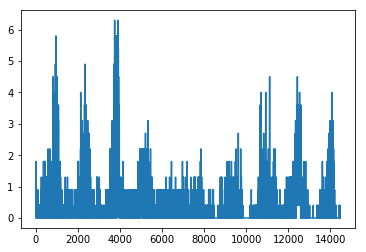

In [18]:
df['Wind Speed'].plot()

In [19]:
df.set_index('DateTime1')

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
DateTime1,,,,,,,,,,,,,,,,,,,,,
2017-01-21 22:40:00,01-21-2017,22:40,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:41:00,01-21-2017,22:41,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2017-01-21 22:42:00,01-21-2017,22:42,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:43:00,01-21-2017,22:43,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:44:00,01-21-2017,22:44,72.8,72.9,72.8,95,71.3,0.4,N,0.03,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
2017-01-21 22:45:00,01-21-2017,22:45,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:46:00,01-21-2017,22:46,72.8,72.9,72.8,95,71.3,0.0,N,0.00,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
2017-01-21 22:47:00,01-21-2017,22:47,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
2017-01-21 22:48:00,01-21-2017,22:48,72.9,72.9,72.9,95,71.4,0.4,N,0.03,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1


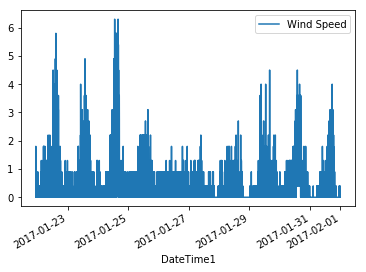

In [23]:
df.plot(x='DateTime1',y='Wind Speed')


In [24]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [25]:
df

,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,Hi Dir,...,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.,DateTime1
0,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,1.8,N,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:40:00
1,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,2.2,SW,...,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1,2017-01-21 22:41:00
2,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,3.1,SW,...,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1,2017-01-21 22:42:00
3,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,2.7,WSW,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:43:00
4,72.8,72.9,72.8,95,71.3,0.4,N,0.03,0.9,N,...,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1,2017-01-21 22:44:00
5,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,0.4,SE,...,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1,2017-01-21 22:45:00
6,72.8,72.9,72.8,95,71.3,0.0,N,0.00,1.8,SSW,...,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1,2017-01-21 22:46:00
7,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,0.4,SW,...,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1,2017-01-21 22:47:00
8,72.9,72.9,72.9,95,71.4,0.4,N,0.03,0.9,SW,...,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1,2017-01-21 22:48:00
9,72.9,72.9,72.9,95,71.4,0.4,N,0.03,1.3,SW,...,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1,2017-01-21 22:49:00


In [26]:
df.set_index('DateTime1')


,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,Hi Dir,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
DateTime1,,,,,,,,,,,,,,,,,,,,,
2017-01-21 22:40:00,72.8,72.8,72.8,95,71.3,0.4,SW,0.03,1.8,N,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:41:00,72.8,72.8,72.8,95,71.3,0.9,SW,0.05,2.2,SW,...,55,69.7,93.0,9.79,1.1358,0.0,24,1,100.0,1
2017-01-21 22:42:00,72.8,72.8,72.8,95,71.3,1.8,SW,0.11,3.1,SW,...,55,69.7,93.0,9.79,1.1358,0.0,23,1,100.0,1
2017-01-21 22:43:00,72.8,72.9,72.8,95,71.3,0.9,SW,0.05,2.7,WSW,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:44:00,72.8,72.9,72.8,95,71.3,0.4,N,0.03,0.9,N,...,55,69.8,93.1,9.79,1.1356,0.0,24,1,100.0,1
2017-01-21 22:45:00,72.9,72.9,72.8,95,71.4,0.0,SE,0.00,0.4,SE,...,55,69.8,93.1,9.79,1.1355,0.0,23,1,100.0,1
2017-01-21 22:46:00,72.8,72.9,72.8,95,71.3,0.0,N,0.00,1.8,SSW,...,55,69.8,93.1,9.79,1.1355,0.0,24,1,100.0,1
2017-01-21 22:47:00,72.9,72.9,72.8,95,71.4,0.0,SW,0.00,0.4,SW,...,55,69.9,93.3,9.79,1.1352,0.0,23,1,100.0,1
2017-01-21 22:48:00,72.9,72.9,72.9,95,71.4,0.4,N,0.03,0.9,SW,...,55,69.9,93.3,9.79,1.1352,0.0,24,1,100.0,1


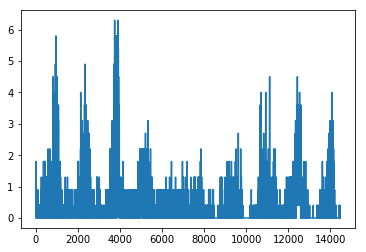

In [27]:
df['Wind Speed'].plot()

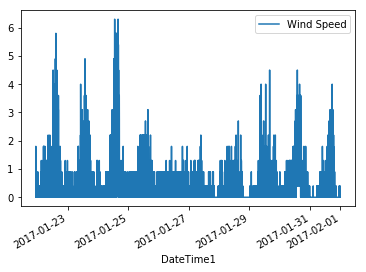

In [28]:
df.plot(x='DateTime1',y='Wind Speed')

In [29]:
df.values.shape

(14463, 37)

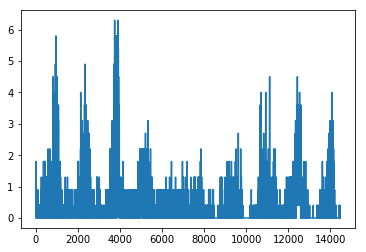

In [30]:
df.set_index('DateTime1')
df['Wind Speed'].plot()


TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [23-01-2017] of <class 'str'>